<center><img src="Fig/ENSIMAG.png" width="30%" height="30%"></center>
<center><h3>Ensimag 2A</h3></center>
<hr>
<center><h1>Optimisation Numérique</h1></center>
<center><h2>TP: Algorithmes de descente de gradient et (quasi-) Newton</h2></center>

---

# Introduction

L'objectif de ce TP est de se familiariser avec les algorithmes d'optimisation numérique en codant deux algorithmes de base et en observant leur comportement sur deux fonctions simples.

---

L’ensemble d’un programme d'optimisation se présente en deux parties :
* *un simulateur :* il est chargé de calculer la fonction (ainsi que le gradient et éventuellement la Hessienne) en chaque point décidé par l’algorithme. Souvent, la fonction à minimiser n’est connue que via ce simulateur.
* *l’algorithme proprement dit :* il comporte dans notre cas deux boîtes principales correspondant au calcul de la direction, et au calcul du pas.

--- 
En pratique, nous allons séparer *simulateurs* et *partie algorithmique* de la manière suivante :
* `TP.ipynb`, le présent fichier, contiendra l'énoncé, les algorithmes développés, et sera l'environnement d'éxécution et d'affichage
* `src/sim_f1.py` et `src/sim_f2.py` contiendront les simulateurs des fonctions étudiées, à compléter.
* Dans `src` les squelettes des trois algorithmes étudiés sont fournis

In [1]:
%load_ext autoreload
%autoreload 2

**Example d'import d'un simulateur :** 

In [2]:
from src.sim_f1 import SimF1

---

## Exercice 1.  Simulateurs

> Ecrire dans les fichiers respectifs `src/sim_f1.py` et `src/sim_f2.py`  un simulateur pour les fonctions suivantes :
> $$\begin{array}{rl} f_1(x) =& \sum_{k=1}^n k x_k^2 ~~~ \text{ pour }  x\in\mathbb{R}^n\\ f_2(x) =& (1-x_1)^2 + 100(x_2-x_1^2)^2 ~~~ \text{ pour }  x=(x_1,x_2)\in\mathbb{R}^2\end{array}$$ 

Calculer (sur papier) les minima globaux de ces deux fonctions.

Le format du simulateur doit etre

```python
class MonSimulateur
    def sim(self, x):
        # Calcul de la valeur de la fonction et de son gradient en x
        f = ...(x)
        g = ...(x)
        return f, g  # Ou (f, g, h) 
```

avec `x` la valeur de la variable pour laquelle il faut évaluer $f$ et son gradient, `f` qui vaut $f(x)$ et `g` qui vaut $\nabla f(x)$.  

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Exercice 2.  Lignes de niveaux et plot 3D

> Visualiser la géométrie des lignes de niveaux ainsi que le tracé 3D de la fonction pour $f_1$ avec $n=2$ et $f_2$ à l'aide des méthodes `level_plot` et `custom_3dplot`. Les paramètres de ces tracés peuvent être changés dans les fichiers des simulateurs respectifs. Discuter la convexité des deux fonctions.

#### Fonction $f_1$

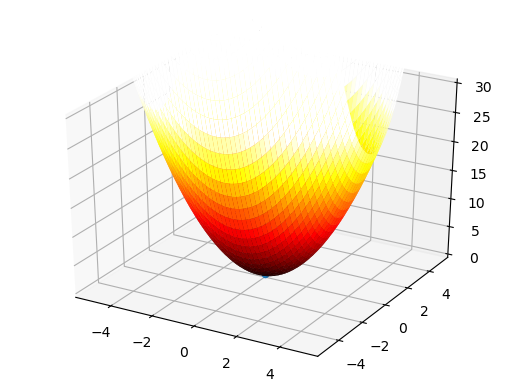

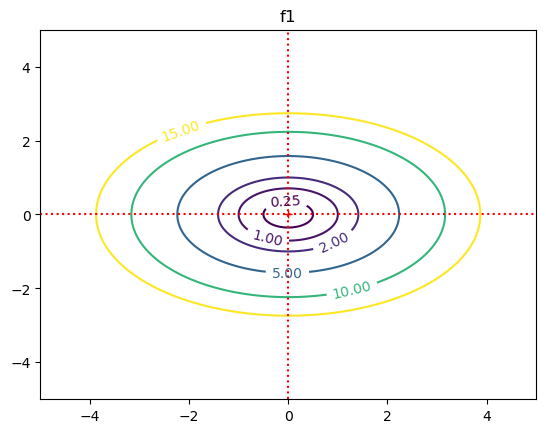

In [4]:
%matplotlib inline

f1 = SimF1(2, 300)

f1.custom_3dplot()
f1.level_plot()
pass

#### Fonction $f_2$

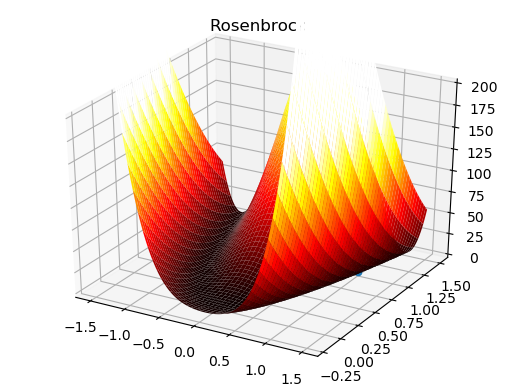

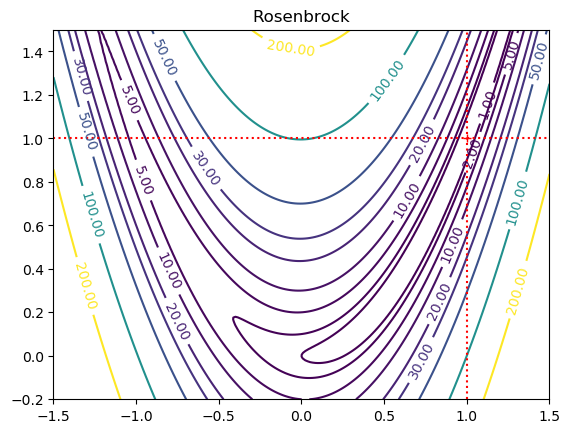

In [5]:
%matplotlib inline
from src.sim_f2 import SimF2

f2 = SimF2(200)
f2.custom_3dplot()
f2.level_plot()
pass

## Exercice 3. Algorithme de gradient à pas constant

Commençons par un algorithme de descente simple : la méthode du gradient à pas constant. À chaque itération, on fixe deux choses : la direction de descente $d = -\nabla f(x)$ et le pas $\gamma>0$, la méthode s'écrit alors 
$$ x_{k+1} = x_k - \gamma \nabla f(x_k). $$

> Dans `src/gd.py`, remplir les parties manquantes du code.
> Les paramètres importants sont les suivants :
> * `sim` le nom du simulateur
> * `x0` le point initial
> * `gamma` le pas (constant)
> * `PREC` la précision attendue (la norme du gradient au point final souhaitée)
> * `ITE_MAX` le nombre maximal d'itérations à faire

> `(...).run()` retourne le point final, ainsi que le tableau $k\times n$ des iterées où $k$ est le nombre d'itérations effectuées.


In [6]:
import numpy as np
from src.gd import GradDescent


Appliquer l'algorithme précédent pour minimiser $f_1$ en dimension 2 à partir de $x_0 = (-1,-1)$. 
> Tester plusieurs pas de descente : $\gamma = 0.1$, puis $\gamma = 0.5$, et $\gamma=1$. 

> Tester ensuite en dimension supérieure.

In [7]:
from plotLib import *
%matplotlib inline

#### Parameter we give at our algorithm
PREC    = 0.001                      # Sought precision
ITE_MAX = 10                         # Max number of iterations
x0      = np.array( [-1.0 , -1.0] )  # Initial point
gamma   =  0.1                      # Stepsize

gd = GradDescent(ITE_MAX, f1, x0, gamma)
finished, x_tab = gd.run()

STOPPED -- final value: 0.011602338214869735




> Dans le cas $n=2$, tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

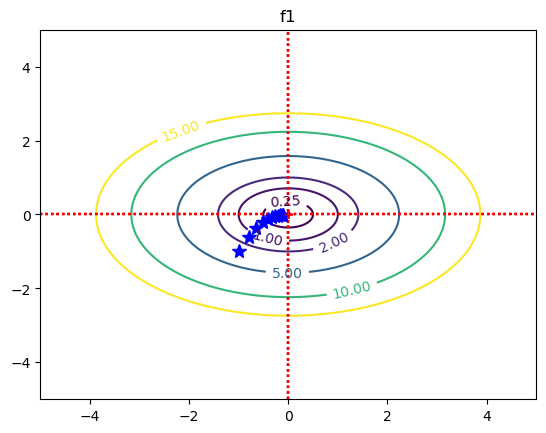

In [8]:
%matplotlib inline

f1.level_points_plot(x_tab)

De même pour minimiser $f_2$ : 

> Expérimenter différents paramètres à partir de $x_0= (-1,1.2)$.

In [9]:
%matplotlib inline

#### Parameter we give at our algorithm
PREC    = 0.0001                     # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point
gamma   = 0.0005                      # Stepsize


gd = GradDescent(ITE_MAX, f2, x0, gamma)
finished, x_tab = gd.run()

STOPPED -- final value: 0.0039702403672326695




> Tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

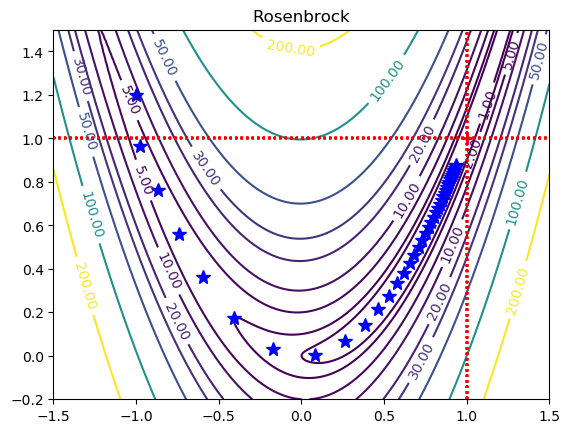

In [10]:
from plotLib import *
%matplotlib inline

f2.level_points_plot(x_tab)

## Exercice 4. Recherche linéaire

La question précendente montre la difficulté de choisir un bon pas de descente. 

Une manière de choisir un pas $\gamma$ satisfaisant est de tester différents pas en appellant plusieurs fois le simulateur. Cette procédure s'appelle recherche linéaire ; la recherche linéaire de Wolfe est implémentée dans la classe `WolfeLineSearch` du fichier `src/wolfe.py`.

**`function`** *Wolfe_line_search(sim,xk,pk)* 
* Input:
    * `sim` a function simulator
    * `xk` the current point
    * `pk` the current descent direction
* Output:
    * `alpha` an admissible stepsize satisfying Wolfe conditions (`double`) or `None` if the method did not converge 

**Méthode de Wolfe.** Soit un point $x$, une direction de descente $d$, et $q(t)=f(x+\gamma d)$. La recherche linéaire de Wolfe consiste à decider que
* $\gamma$ est satisfaisant si $q(t)\leq q(0)+m_1 \gamma q'(0)$ et $q'(t)\geq m_2 q'(0)$;
* $\gamma$ est trop grand si $q(t) > q(0)+m_1 \gamma q'(0)$;
* $\gamma$ est trop petit si $q(t)\leq q(0)+m_1 \gamma q'(0)$ et $q'(t)<m_2 q'(0)$;

pour deux constantes $0<m_1<m_2<1$, par exemple : $m1 = 0.1, m2 = 0.9$.

> Dans `src/wolfe.py`, remplir les parties manquantes du code.

> Ecrire un algorithme de gradient avec cette recherche linéaire. Le tester sur $f_2$.

In [11]:
from src.wolfe import WolfeLineSearch

In [12]:
#### Parameter we give at our algorithm
PREC    = 1e-6                     # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point

wolfe = WolfeLineSearch(ITE_MAX, f2, x0, prec=PREC)
finished, x_tab = wolfe.run()

STOPPED -- final value: 6.14360793743009e-05




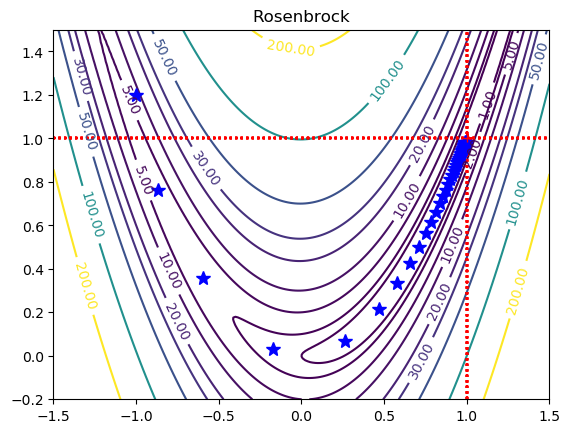

In [13]:
%matplotlib inline

f2.level_points_plot(x_tab)

## Exercice 5. Quasi Newton

Nous avons maintenant une méthode pour choisir un bon pas, nous allons à présent calculer une bonne direction.

Pour une fonction $f$ differentiable, les méthodes de Quasi-Newton construisent successivement une approximation $W_k$ de l'inverse de la Hessienne de la fonction et utilisent la direction $-W_k\nabla f(x_k)$.

**BFGS.** (Broyden-Fletcher-Goldfarb-Shanno, 1970) L'algorithme BFGS consiste à réaliser l'itération
$$ x_{k+1}=x_k - \gamma_k W_k \nabla f(x_k)$$
où $\gamma_k$ est donné par la recherche linéaire de Wolfe et la matrice symmétrique définie positive $W_k$ est
 calculée par la formule de récurrence
$$ W_{k+1}=W_k - \frac{s_k y_k^T W_k+W_k y_k s_k^T}{y_k^T s_k} +\left[1+\frac{y_k^T W_k y_k}{y_k^T s_k}\right]\frac{s_k s_k^T}{y_k^T s_k} $$
avec $s_k=x_{k+1}-x_{k}$ et $y_k=\nabla f(x_{k+1}) - \nabla f(x_{k})$.

Le schéma général d'une méthode de quasi-Newton est alors :
* avec l'itéré initial $x_0$, se donner une matrice initiale $W_0$ symétrique définie positive;
* connaissant le gradient $\nabla f(x_k)$, calculer la direction $d_k=-W_k \nabla f(x_k)$;
* calculer le pas $\gamma_k$ par recherche linéaire de Wolfe;
* connaissant le nouvel itéré $x_{k+1}$, appeler le simulateur et calculer la nouvelle matrice $W_{k+1}$.

> Dans `src/bfgs.py`, remplir les parties manquantes du code.
> Les paramètres importants sont les suivants :
> Implémenter la méthode BFGS et la tester sur la fonction $f_2$.

*Indication: utiliser la fonction `np.outer(a,b)` pour calculer $ab^T$.*


In [14]:
from src.bfgs import BFGSDescent

In [17]:
#### Parameter we give at our algorithm
PREC    = 1e-6                    # Sought precision
ITE_MAX = 10000                      # Max number of iterations
x0      = np.array( [ -1 , 1.2] )    # Initial point

bfgs = BFGSDescent(ITE_MAX, f2, x0, prec=PREC)
finished, x_tab = bfgs.run()

Convergence atteinte à l'itération 31 : norme du gradient < 1e-06
FINISHED -- 31 iterations -- final value: 1.9673328991452746e-18




> Tracer les itérées sur les lignes de niveau de la fonction par la fonction `level_points_plot`.

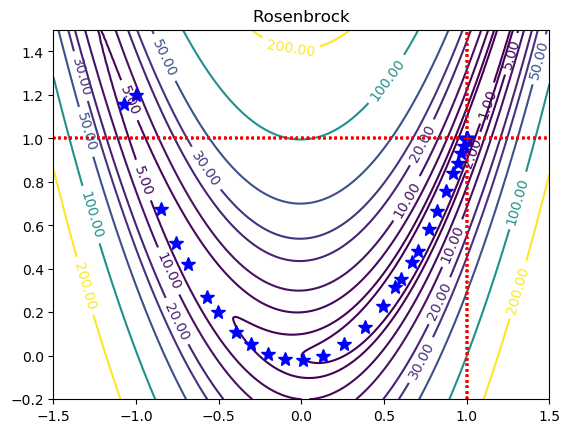

In [18]:
f2.level_points_plot(x_tab)

## Bonus: Newton

> Créer dans les fichiers `sim_f1.py` et `sim_f2.py` un nouveau simulateur retournant également la Hessienne des fonctions respectives.
> Implémenter dans une nouvelle classe la méthode de Newton $$ x_{k+1} = x_k - [\nabla^2f(x_k)]^{-1} \nabla f(x_k)$$ et comparer avec Quasi-Newton.

In [23]:
import matplotlib.pyplot as plt
from src.sim_f1 import SimNewtonF1

# compare convergence of Newton's method and quasi-Newton's method on f1
f1 = SimNewtonF1(2, 300)




